# USU basic knowledge
_(*some mathematics)_

Strojové učení rozdělujeme do 2 primárních skupin

1. **Učení s učitelem** *(Supervised Learning)* - model má připravená v trénovacích datech i očekávaný výstup

2. **Učení bez učitele** *(Unsupervised Learning)* - model nemá připravený očekávananý výstup

další dělení

- posilované učení *(Reinforcement Learning)* - dostává nějakou zpětnou vazbu z prostředí ve kterém působí

- semi-supervised - v trénovacích datech se nachází data s očekávanými výstupy i bez

![https://www.linkedin.com/pulse/classification-vs-regression-machine-learning-dr-pawan-whig](https://media.licdn.com/dms/image/v2/C5112AQElcSuLCaJOnQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1569408046088?e=2147483647&v=beta&t=6rVBtfEnqKFWvOJZVMyZlHTpexk3J2kyQIR0wVUmxDY)

https://www.linkedin.com/pulse/classification-vs-regression-machine-learning-dr-pawan-whig

## Učení s učitelem

dělí se dále na:

1. **Klasifikátory** - přiřazuje do tříd

2. **Regresory** - vrací nějakou číselnou hodnotu

## Učení bez učitele

dělí se na:

1. **Shlukování** - rozděluje body dat do shluků ("bublin")

2. **Redukce dimensionality** - redukuje přebytečná (nerelevantní) data z velkých datasetů

## Data

dělení:

- trénovací data - tensor, ze kterého se model učí

- validační data - tensor, který se pouzívá při učení k porovnání modelu (nejsou součástí trénování)

- testovací data - tensor, který se používá na zhodnocení modelu na nenatrénovaných datech

Úprava s datasetem při chybějících datech

- Odebrat špatné vzorky, pokud významně neovlní množství vstupních dat (velký dataset)

- Vložit zprůměrovanou hodnotu

- Interpolovat, z data vyvořit křivku a aproximovat (odhadnout) jaká hodnota by tam měla být (vhodné pro časové řady)

Modely neumí pracovat s různými datovými typy (krom stromu), potřeba převěst na modelu srozimutelné hodnoty

- Labeling - data se přes nějaký slovník převedou na kategorické čísla

- One-Hot - každá kategorie bude reprezentována jako sloupec a {1,0} reprezentovat její přítomnost

U dat, které jsou v různých měřítkách je často potřeba je normalizovat a standardizovat (1kg a 1000g -> MSE = |1 + 1000|^2)

- MinMaxScaler, StandardScaler

### Normalizace

- $z_i = \frac{x_i - \mu_i}{\sigma_i}$ normalizovaná hodnota (z-score)

- normalizuje se do intervalů <-1,1> nebo <0,1>

Odebrat odlehlé hodnoty

- třeba přes boxplot pravidlo, nebo 3 (4) sigma

- boxplot: kandidáti na odlehlé hodnoty jsou $|k*IQR|$, kde $k \in \{1.5,3\}$ a IQR je mezikvartilové rozhraní (krabice)

- 3 (4) sigma: kandidáti na odlehlé hodnoty 3\*směrodatná odchylka nebo 4\*směrocatná odchylka

[odkaz na Kuberovo Collab s daty](https://colab.research.google.com/drive/1BUZ82r-c5xALO7SGO2f8Dl9X8mwtp86T#scrollTo=DRHdYGuXA6yz)

## Optimalizace modelů

Každou iterací (step) s množstí vzorků (batch size) se upravují  parametry modelu

počet iterací je data/batch size, pokud není změněno parametrem steps per epoch

Epocha značí projetí celého datasetu, ale model neupravuje (poskok v metrikách je nevývaženost parametrů s prvním vzorkem)

## Příznakový prostor

abstraktní prostor kde osy jsou vlastnosti (příznaky) dat a jednotlivé vzorky jsou reprezentovány jako body v tomto prostoru 

nejedná se pouze o vizualizaci, v prostoru se provádějíi vzdáleností metriky a ztrátové funkce

## Klasifikace

1. binarní - pouze jedna hodnota, 1 nebo 0

2. multiclass - více výstupních hodnot

3. multilabel - jeden výstup pro každou třídu

### vícetřídová klasifikace

- jak se řeší, když výstupem není binární klasifikace (0/1)

#### ONE VERSUS REST (OVR)

- každá třída má svůj klasifikátor, který vrací hodnoty, jestli se jedná o třídu nebo ne

- použíá se logická regrese pro určení nejlepší třídy

#### ONE VERSUS ONE (OVO)

- sestaví se $\frac{n \cdot (n-1)}2$ klasifikátorů, každý rozhoduje mezi dvojicí tříd

- nej pravděpodobnější je vybrána

- rychlejší než OVR (méně klasifikátorů)

## Hodnocení binární klasifikace

- klasifikace se hodnotí podle spávně predikovanými výstupy a špatně predikovanými výstupy

- zobrazuje se v confusion matrix

| | | realita | |
| --- | --- | --- | --- |
| | |1|0|
|klasifikator|1|TP (True Positive)|FP (False Positive)|
| |0|FN (False Negative)|TN (True Negative)|

- kde na diagonale jsou spravne odhadnuty (vysledek klasifikatora == realna hodnota)


- metriky:

    1. Senzitivita (true positive rate)

        $TPR = \frac{TP}P$

    2. Specifita (true negative rate)

        $TNR = \frac{TN}N$

    3. Přesnost (accuracy)

        $ACC = \frac{TP+TN}{P+N}$

    4. Prediktivní hodnoty pozitivního testu (precision)

        $PPV = \frac{TP}{TP+FP}$

    5. Prevelance
    
        $Prevelance = \frac P{P+N}$

## Regularizace

- metodika která snižuje váhy při učení modelu

- váhy tím nejsou komplexní -> udržuje se lehčí model a lepší generalizace

- příklad: $MSE + c\|w\|^2$

## Sigmoida

- jedna z aktivačních funkcí, často používaná

$sigmoid = \frac 1{1+e^{-X}}$

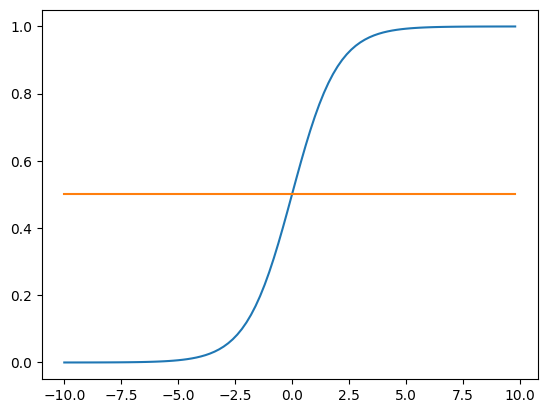

In [1]:
import numpy as np, matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.e**(-x))

x_vec = np.arange(-10, 10, 0.2)

plt.plot(x_vec, sigmoid(x_vec))
plt.plot(x_vec, [0.5]*x_vec.size)
plt.show()

## Ztrtátová funkce

- formuluje se jako optimalizační problém, kde se hledá minimum

$J(w) = \sum_i \text{max}(0, -y_i \cdot w^T x_i)$

$
\begin{array}{r|cc}
y_i & 0 & 1 \\
w^T_i & \le 0 & \ge 1 \\
\end{array} \quad
$
 správně identifikovaný -> nemění se váhy

jinak se váhy pozmění

### Minimalizace ztrátové funkce

- spádové metody

$w^{k+1} = w^k - \eta ^k \nabla_w J(w)$

k - iterace

$n^k \in \Re$  - délka kroku

$\nabla_w J(w)$ gradient (vektor parciálních derivací funkce podle w)

- jednoduché, efektivní a dobře škálovatelné


Logická regrese

- nahrazení skokové aktivační/klasifikační funkce spojitou (sigmoida)

$\hat y = \frac 1 {1 + e^{-wX}}$

$wX$ - skalární součin vektorů $wX = \sum_k w_k \cdot x_k$

------------------------ **probably rest is missing** ------------------------

## Ztrtátová funkce

- formuluje se jako optimalizační problém, kde se hledá minimum

$J(w) = \sum_i \text{max}(0, -y_i \cdot w^T x_i)$

$
\begin{array}{r|cc}
y_i & 0 & 1 \\
w^T_i & \le 0 & \ge 1 \\
\end{array} \quad
$
 správně identifikovaný -> nemění se váhy

jinak se váhy pozmění

### Minimalizace ztrátové funkce

- spádové metody

$w^{k+1} = w^k - \eta ^k \nabla_w J(w)$

k - iterace

$n^k \in \Re$  - délka kroku

$\nabla_w J(w)$ gradient (vektor parciálních derivací funkce podle w)

- jednoduché, efektivní a dobře škálovatelné


Logická regrese

- nahrazení skokové aktivační/klasifikační funkce spojitou (sigmoida)

$\hat y = \frac 1 {1 + e^{-wX}}$

$wX$ - skalární součin vektorů $wX = \sum_k w_k \cdot x_k$

------------------------ **probably rest is missing** ------------------------

## Různé typy modelů

### Stromy

- model, který dokáže řešit klasifikační i regresní problematiky

- model, nevyžaduje normalizaci a je schopný pracovat i s kategoriálními proměnnými

- model nevyžaduje parametry krom jednoho a to je maximální hloubka stromu

- model má nevýhodu přeučení a špatné generalizace (zevšeobecňování)

- pro naučení modelu se používájí techniky:

    #### Impurita

    - rozhoduje jak se má větev vyvíjet (dílčí uzly) podle metriky, která odhaduje nejlepší vlastnost. snaží se vytvářet uzly, které jsou nejčistčí (nejpodobnější prvky)

    - metody zakládají na tom, že hledají takové prvky, kde je jich nejvíce se stejným labelem  (untrue, tohle dělá informační zidk, impurita je jej součástí)

    - pokud jsou data rovnoměrná (všechny prvky patří do jedné třídy/labelu) je metrika $=0$

        ##### Entropie

        $I_H(m) = - \sum_{i=1}^c p(i|m) \log_2 (p(i|m))$

        ##### Gini impurity

        $I_G(m) = - \sum_{i=1}^c p(i|m) \cdot (1-p(i|m)) = 1 - \sum_{i=1}^c p(i|m)^2$

        ##### Chyba klasifikace

        $I_E(m) = 1 - \text{max}_{i = 1,\ldots,c}(p(i|m))$


    - i = třída     m = množina dat     P(i|m) = četnost dat odpovídající třídě v množině


    #### Tvorba uzlů stromu

    - uzly se formují pomocí **imformačního zisku** pro získání nejoptimálnější stromové struktury

    - -> nejvíce zlepší (minimalizuje) impuritu

    - pro binární strom:

    $IG(D_p, f, v_f) = I(D_p) - \frac{\#D_{p,L}}{\#D_p} \cdot I(D_{p,L}) - \frac{\#D_{p,R}}{\#D_p} \cdot I(D_{p,R})$

    $I(D_p)$ - impurita rodičovského uzlu

    $\frac{\#D_{p,L}}{\#D_p}$ a $\frac{\#D_{p,R}}{\#D_p}$ - váhy odpovídající velikosti potomků

    $I(D_{p,L})$ a $I(D_{p,R})$ - impurity v potomcích


    #### Pruning

    - jedná se o metodiku, která řeší přenaučení stromů (stromy mají uzly s jednou proměnnou)

    - stromy řeže tak aby se tyto uzly redukovaly

        ##### pre-prunning

        - nastavování těchto pravidel před/při trénování aby strom nevlezl do určité hloubky. (princip Occamova břitva)

        ##### post-prunning

        - po natrénování modelu se strom ořeže o nechtěné/nejhlubší uzly

    #### Lesy

    - stromy lze seskupit do jednoho většího modelu, kde stromy "spolupracují" k získání lepšího výsledku (Základní myšlenka: více hlav víc ví)

    - dva hlavní algoritmy:

        ##### Bagging

        - data set je rozdělený na menší části, který se můžou překrývat.

        - na každé sub-sadě se učí jeden klasifikátor -> paralelní učení

        - výsledek je většinový hlasování klasifikátorů

        - příklad: RandomForest

        - také se snižuje přiznakový prostor (max_features)

        ##### Boosting

        - data set se rozdělí na menší části

        - postupně se stromy učí na sub-sadě a klasifikace, které byly špatně byly předány dalšímu

        - jde o postupný konstruování stromů tam kde předchozí selhali

        - používá se slabý klasifikátor (strom s malou hloubkou)

        - příklad: AdaBoost, Gradient Tree Boosting

    [odkaz na Kuberovo Collab o stromech](https://colab.research.google.com/drive/1GhWPvxWwgPTS-1kwP3KdDu1C6-wdE19w#scrollTo=I3UtUrsMpaQD)

### Bayes

- základní Bayesovská věta : $P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

- realističtější popis: $P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}$

- P(E|H) se získává z již obdržených dat => $P(E|H) = \frac{(P(E) =true \bigwedge P(H) =true)}{P(H)}$


$$
P(y_j | x_\ast) = \frac {P(x_\ast | y_j) \cdot P(y_j)}{P(x_\ast)} = \frac {P(x^1=x^1_\ast | y_j) \cdot P(x^2=x^2_\ast | y_j) \cdot \ldots \cdot P(x^m=x^m_\ast | y_j) \cdot P(y_j)}{P(x_\ast)}
$$

příklad pro pochopení:


| věk | pohlaví | y |
|-----|---------|---|
|  10 |    m    | 1 |
|  30 |    ž    | 1 |
|  50 |    ž    | 0 |


$x^\ast = {x^1, x^2} = \{\text{věk, pohlaví}\} \\ \quad \\ x^i_\ast = \text{ např.: } x^1_\ast = \{10,30,50\} \quad x^2_\ast = \{m,ž,ž\}$


Součet pravděpodobností: $P(y_j == 0 | x_\ast)$ a $P(y_j == 1 | x_\ast) = 1$

=> určí se $P(x_\ast)$
=> určí se výsledné pravděpodobnosti

### Redukce dimensionality

#### Prokletí dimensionality

- čím větší je dimensionality ("sloupce") => více variací => potřeba více dat

- ztrácí se hustota

#### Statistika pro redukci

- míra variability pomocí rozptylu $\sigma ^2$

$\sigma ^2 = \sum^n_1 (x_i - E[x])^2 \cdot p_i \quad \quad \quad p_i = \frac 1n \text{ pro stejné pravděpodobnosti}$ 

- vhodné převést na stejné měřítko ale nestandardizovat (proč? idk 🤷)

#### Lineárně regresní model

$y \approx \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Pearsonův korelační koeficient

F-test regresorů

chi-2 testy

Fischer-score


### SVD 

- maticová faktorizační metoda

$A = U \textstyle \sum V^T$

$U = [u_1, u_2, \ldots , u_n] \quad \\ \tiny U(n \times n)$ ortogonální matice (vektor vektorů)

$\textstyle \sum \quad \\ \tiny \textstyle \sum(n \times m)$ diagonální matice, která obsahuje singulární hodnoty

$V^T = \left[ \begin{array}{c} v_1 \\ v_2 \\ \vdots \\ v_m  \end{array} \right] \quad \\ \tiny V(m \times m)$ ortogonální matice 

$u_i$ = levé singulární vektory, $v_i$ = pravé singulární vektory

ortogonální matice je čtevrcová matice u které platí: $Q^T \cdot Q = Q \cdot Q^T = I \text{(jednotková matice)}$

------------------------ **rest is missing** ------------------------

### Metoda podpůrných vektorů

- metoda, která se snaží vytvořit rozdělení s největším odstupem od tříd

#### Hard margin

- data se nesmí nacházet za danou hranicí

- hranice tvoří pás

- pás: $d = \frac 2 {\|w\|}$, pás se však snažíme maximalizovat: optimalizační úloha: $\text{max } d = \frac 2 {\|w\|}$

- optimalizace kvadratického programování

- maximalizační úlohu můžeme inverzovat a chtít minimalizační úlohu (která je jednodušší) $\text{max } \frac 2 {\|w\|} \Longrightarrow min \frac {\|w\|^2} 2$

- s podmínkama $y_i (w^T \cdot x_i +b) - 1 \ge 0$



#### Soft margin

- data se mohou nacházet za danou hranicí, ale chce se minimalizovat toto povolení



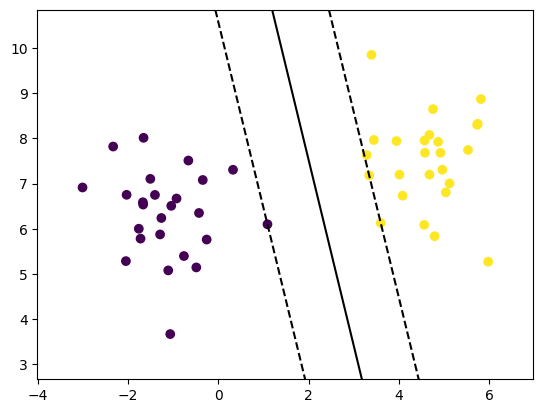

In [35]:
import numpy as np, matplotlib.pyplot as plt, sklearn.datasets, sklearn.svm, sklearn.inspection

X, y = sklearn.datasets.make_blobs(50, 2, centers=2, random_state=27) #type: ignore

support_vec_model = sklearn.svm.SVC(kernel="linear").fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y)
ax = plt.gca()
sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
    support_vec_model,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    linestyles=["--", "-", "--"],
    ax=ax,
)

plt.show()

#source: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py

### KNN

- algoritmus, který nepotřebuje parametry, krom počtu sousedů se kterými bude pracovat, a je typ bez učitele

- jedná se o líný algoritmus, protože nemá fázi učení, pracuje pouze s tím co má uložené

    #### postup

    - vezme se bod x 

    - algoritmus se podívá kde se v příznakovém prosotru nachází a vybere k nejbližších bodů

    - při klasifikaci určí třídu pro bod x podle nejfrekventovanější třídy

    - při regresi určí průměrovanou hodnotu z k sousedních bodů


- algoritmus počítá vzdáenosti od bodů, jeden z metrik je **Euklidovská vzdálenost**

    $d(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \dots + (p_n - q_n)^2}$

    #### výhody

    - Jednoduchost: Algoritmus je snadný na implementaci a pochopení.
    - Flexibilita: KNN lze použít jak pro klasifikaci, tak pro regresi.
    - Nevyžaduje trénování modelu: Neexistuje žádná explicitní fáze učení, data jsou přímo použita při předpovídání.

    #### nevýhody

    - Výpočetní náročnost: Algoritmus může být pomalý při velkém množství dat, protože musí při každém předpovědi procházet všechny trénovací body.
    - Citlivost na volbu k: Hodnota parametru k může významně ovlivnit výkon modelu. Malé k může způsobit vysokou variabilitu, zatímco velké k může způsobit přehlížení jemných detailů v datech.
    - Nevhodný pro vysokodimenzionální data: KNN může selhávat, když pracuje s daty s mnoha rozměry (tzv. prokletí dimenzionality).